In [1]:
%matplotlib inline

import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
import pickle
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import io

from scipy.ndimage.measurements import label
from scipy.ndimage.morphology import binary_dilation, grey_dilation

from util import *

In [2]:
svc = pickle.load(open('trained_classifier.pkl', 'rb'))
X_scaler = pickle.load(open('x_scaler.pkl', 'rb'))


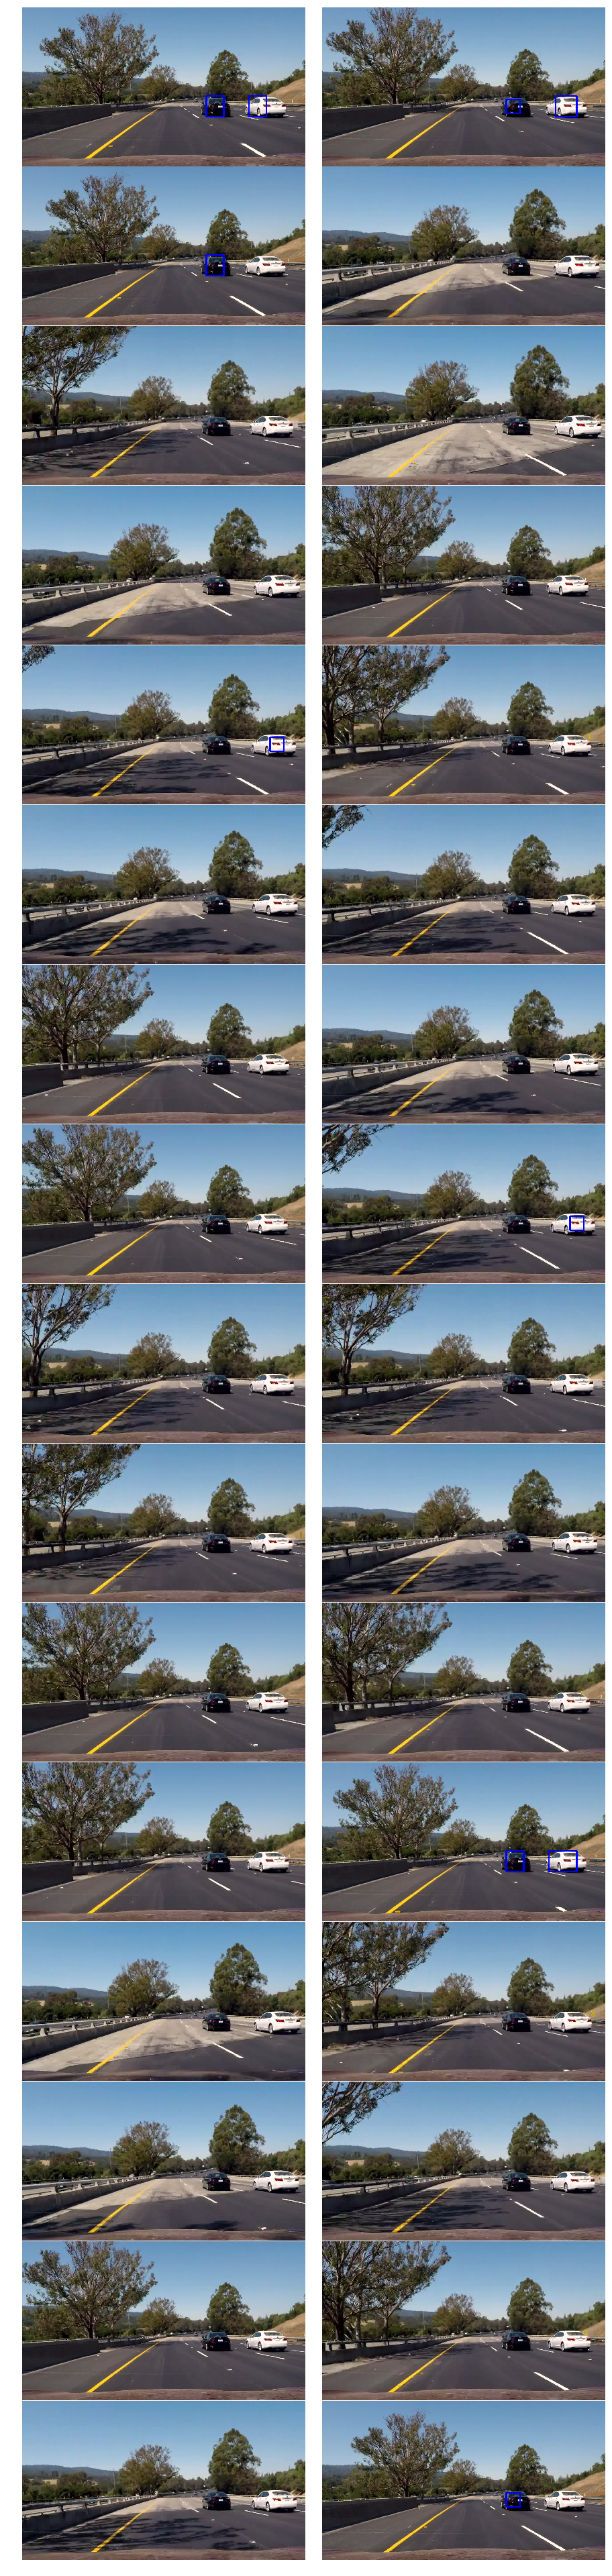

In [3]:
test_images = glob.glob('../video_images/*.jpg')

fig, axs = plt.subplots(16, 2, figsize=(16,70))
fig.subplots_adjust(hspace = .004, wspace=.002)
axs = axs.ravel()

for i, im in enumerate(test_images):
    axs[i].imshow(pipeline(mpimg.imread(im), svc, X_scaler))
    axs[i].axis('off')

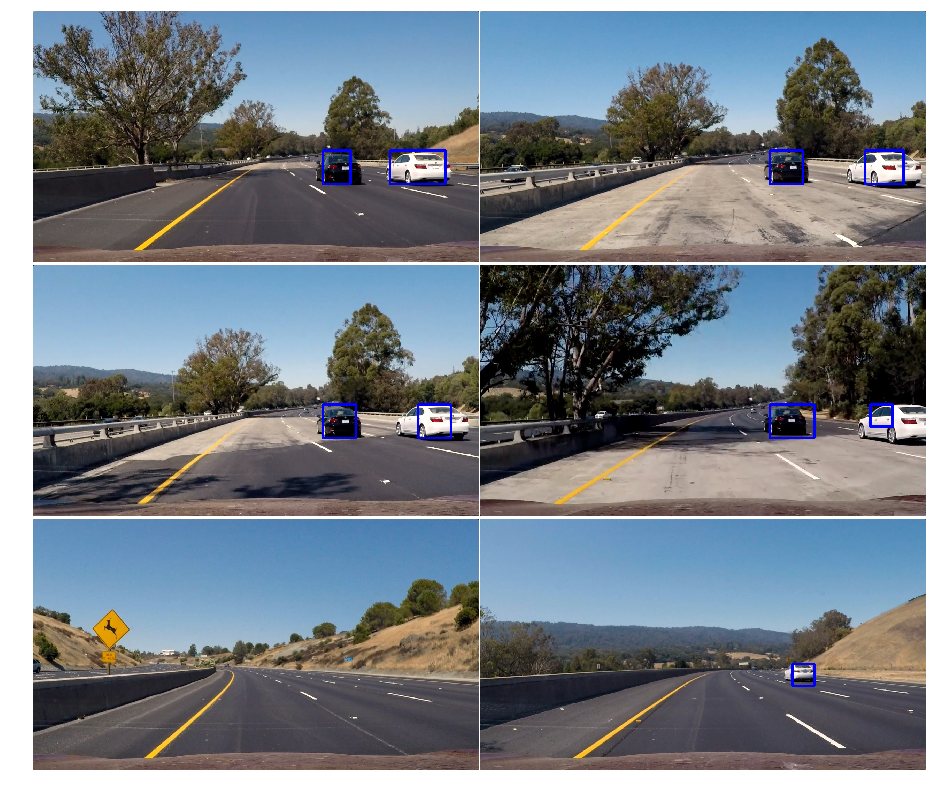

In [4]:
test_images = glob.glob('../test_images/*.jpg')

fig, axs = plt.subplots(3, 2, figsize=(16,14))
fig.subplots_adjust(hspace = .004, wspace=.002)
axs = axs.ravel()

for i, im in enumerate(test_images):
    axs[i].imshow(pipeline(mpimg.imread(im), svc, X_scaler))
    axs[i].axis('off')

In [5]:
vehicles = Vehicles()

proj_out_file = '../project_video_out.mp4'
clip_proj = VideoFileClip('../project_video.mp4') #.subclip(23,26)  # subclip = only specified span of video
#clip_proj.save_frame('./test_images/project1.jpg', t=1.0) # saves the frame at time = t seconds
clip_proj_out = clip_proj.fl_image(lambda img: pipeline(img, svc, X_scaler, vehicles))
%time clip_proj_out.write_videofile(proj_out_file, audio=False)

[MoviePy] >>>> Building video ../project_video_out.mp4
[MoviePy] Writing video ../project_video_out.mp4


100%|█████████▉| 1260/1261 [02:36<00:00,  7.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../project_video_out.mp4 

CPU times: user 8min 56s, sys: 1.16 s, total: 8min 58s
Wall time: 2min 37s
